<a href="https://colab.research.google.com/github/Saravanakumar2005/Cognorise-Infotech/blob/main/HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/output.csv')

DATA WRANGLING

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.103478,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.159990,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
df_encoded = pd.get_dummies(data, columns=['street', 'city', 'statezip', 'country'], drop_first=True)
df_encoded = df_encoded.drop(['street', 'city', 'statezip', 'country'], axis=1,errors='ignore')


In [ ]:
df_encoded.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition',
       ...
       'statezip_WA 98155', 'statezip_WA 98166', 'statezip_WA 98168',
       'statezip_WA 98177', 'statezip_WA 98178', 'statezip_WA 98188',
       'statezip_WA 98198', 'statezip_WA 98199', 'statezip_WA 98288',
       'statezip_WA 98354'],
      dtype='object', length=4657)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']] = scaler.fit_transform(df_encoded[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']])

<Axes: xlabel='price', ylabel='Density'>

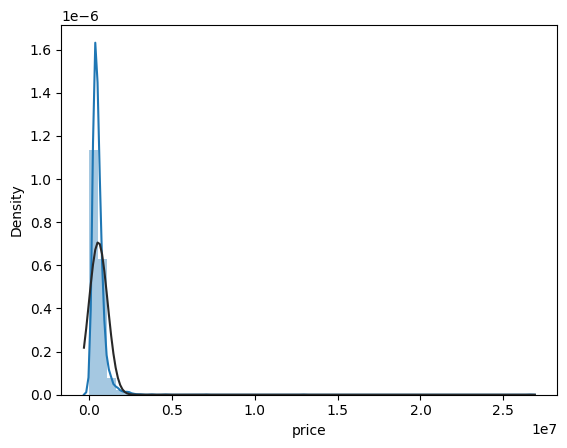

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

sns.distplot(data['price'], fit=norm)

<Axes: xlabel='price'>

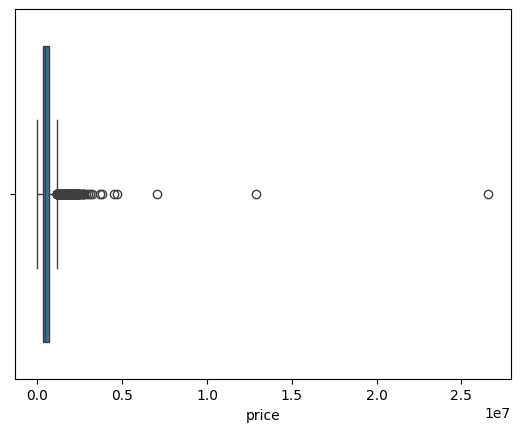

In [ ]:
#is there any outliers
sns.boxplot(data['price'],orient='h')

In [ ]:
#removing the outliers using z_score
from scipy.stats import zscore

z= np.abs(zscore(df_encoded['price']))

In [ ]:
np.where(z>3)[0]

array([   1,  122,  252,  404,  581, 1132, 1543, 1567, 1571, 1600, 1637,
       1858, 2083, 2286, 2328, 2364, 2654, 2712, 2761, 2772, 2980, 3202,
       3284, 3729, 3781, 3791, 3863, 3959, 4135, 4261, 4273, 4346, 4350,
       4465])

In [ ]:
len(np.where(z>3)[0])

34

In [ ]:
np.where(z>4)[0]

array([ 252, 1567, 1637, 2286, 2328, 2654, 2761, 2772, 3729, 4346, 4350])

In [ ]:
df = df_encoded.drop(np.where(z>4)[0])

<Axes: xlabel='price', ylabel='Density'>

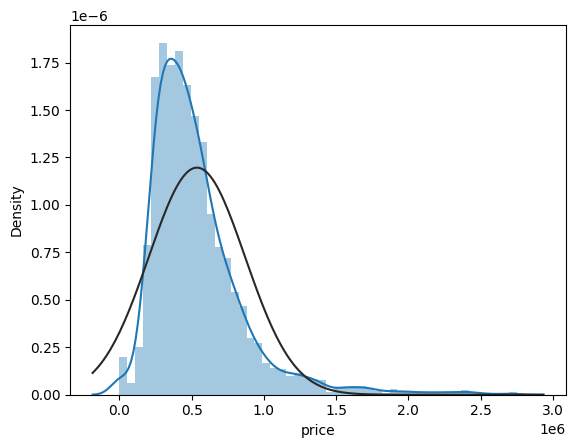

In [ ]:
from scipy.stats import norm

sns.distplot(df['price'], fit=norm)

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr()['price'], annot=True, cmap='RdYlGn')

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition',
       ...
       'statezip_WA 98155', 'statezip_WA 98166', 'statezip_WA 98168',
       'statezip_WA 98177', 'statezip_WA 98178', 'statezip_WA 98188',
       'statezip_WA 98198', 'statezip_WA 98199', 'statezip_WA 98288',
       'statezip_WA 98354'],
      dtype='object', length=4657)

In [ ]:
X = df.drop(['date','waterfront','condition','yr_built','yr_renovated','sqft_lot'], axis=1)
Y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5) #test 20%, train 80%

######Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)


lr_predictions = lr_model.predict(x_test)


lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_r2 = r2_score(y_test, lr_predictions)

print(f'Linear Regression RMSE: {lr_rmse}')
print(f'Linear Regression R^2: {lr_r2}')


Linear Regression RMSE: 8.024717426138035e-10
Linear Regression R^2: 1.0


###Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

dt_model.fit(x_train, y_train)

dt_predictions = dt_model.predict(x_test)

dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
dt_r2 = r2_score(y_test, dt_predictions)

print(f'Decision Tree RMSE: {dt_rmse}')
print(f'Decision Tree R^2: {dt_r2}')

Decision Tree RMSE: 3758.3771465580967
Decision Tree R^2: 0.9998726157356399


####Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(x_test)

# Evaluate the model
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R^2: {rf_r2}')


Random Forest RMSE: 2076.029152391555
Random Forest R^2: 0.9999611329157623
